In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from IPython.display import display
%matplotlib inline

# Loading Dataset

In [2]:
# Soccer database from https://www.kaggle.com/hugomathien/soccer
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
pd.options.display.max_columns = None
#pd.set_option('display.max_rows', None)
df.set_index('id', inplace=True)
df.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null float64
spri

In [6]:
df.describe(include='all')

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183978,183142.000000,183142.000000,183142,180748,183142,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
unique,NaN,NaN,197,NaN,NaN,2,8,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2007-02-22 00:00:00,NaN,NaN,right,medium,medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,11794,NaN,NaN,138409,125070,130846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,165671.524291,135900.617324,NaN,68.600015,73.460353,NaN,NaN,NaN,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,57.069880,63.388879,67.659357,68.051244,65.970910,66.103706,65.189496,61.808427,66.969045,67.038544,67.424529,53.339431,60.948046,52.009271,55.786504,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53851.094769,136927.840510,NaN,7.041139,6.592271,NaN,NaN,NaN,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,14.394464,15.196671,12.983326,12.569721,12.954585,9.155408,13.063188,16.135143,11.006734,13.165262,12.072280,18.367025,16.089521,19.450133,18.448292,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,2.000000,2625.000000,NaN,33.000000,39.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,5.000000,10.000000,12.000000,11.000000,17.000000,12.000000,2.000000,14.000000,10.000000,10.000000,1.000000,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,155798.000000,34763.000000,NaN,64.000000,69.000000,NaN,NaN,NaN,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,58.000000,61.000000,62.000000,58.000000,61.000000,58.000000,54.000000,60.000000,61.000000,60.000000,41.000000,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,183488.000000,77741.000000,NaN,69.000000,74.000000,NaN,NaN,NaN,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,67.000000,69.000000,69.000000,68.000000,67.000000,67.000000,65.000000,68.000000,69.000000,69.000000,58.000000,64.000000,57.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,199848.000000,191080.000000,NaN,73.000000,78.000000,NaN,NaN,NaN,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,73.000000,77.000000,77.000000,75.000000,72.000000,74.000000,73.000000,74.000000,76.000000,76.000000,67.000000,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000


In [7]:
df.isnull().sum(axis=0)

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

In [8]:
df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [9]:
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [10]:
df.preferred_foot.value_counts()

right    138409
left      44733
Name: preferred_foot, dtype: int64

Text(0.5, 1.0, 'Count Of Preferred Foot')

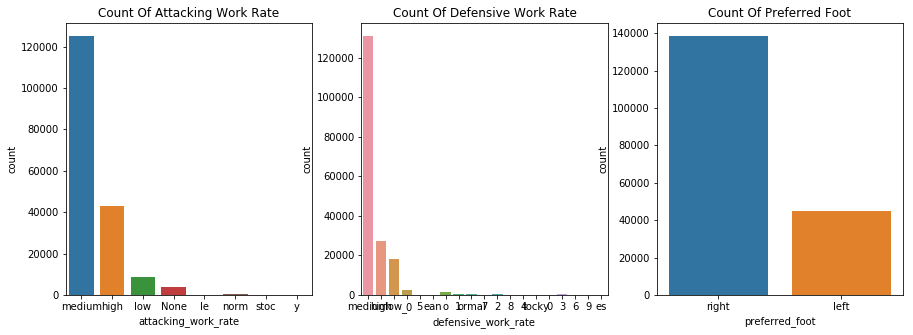

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.countplot(df.attacking_work_rate)
plt.title('Count Of Attacking Work Rate')
plt.subplot(1,3,2)
sns.countplot(df.defensive_work_rate)
plt.title('Count Of Defensive Work Rate')
plt.subplot(1,3,3)
sns.countplot(df.preferred_foot)
plt.title('Count Of Preferred Foot')

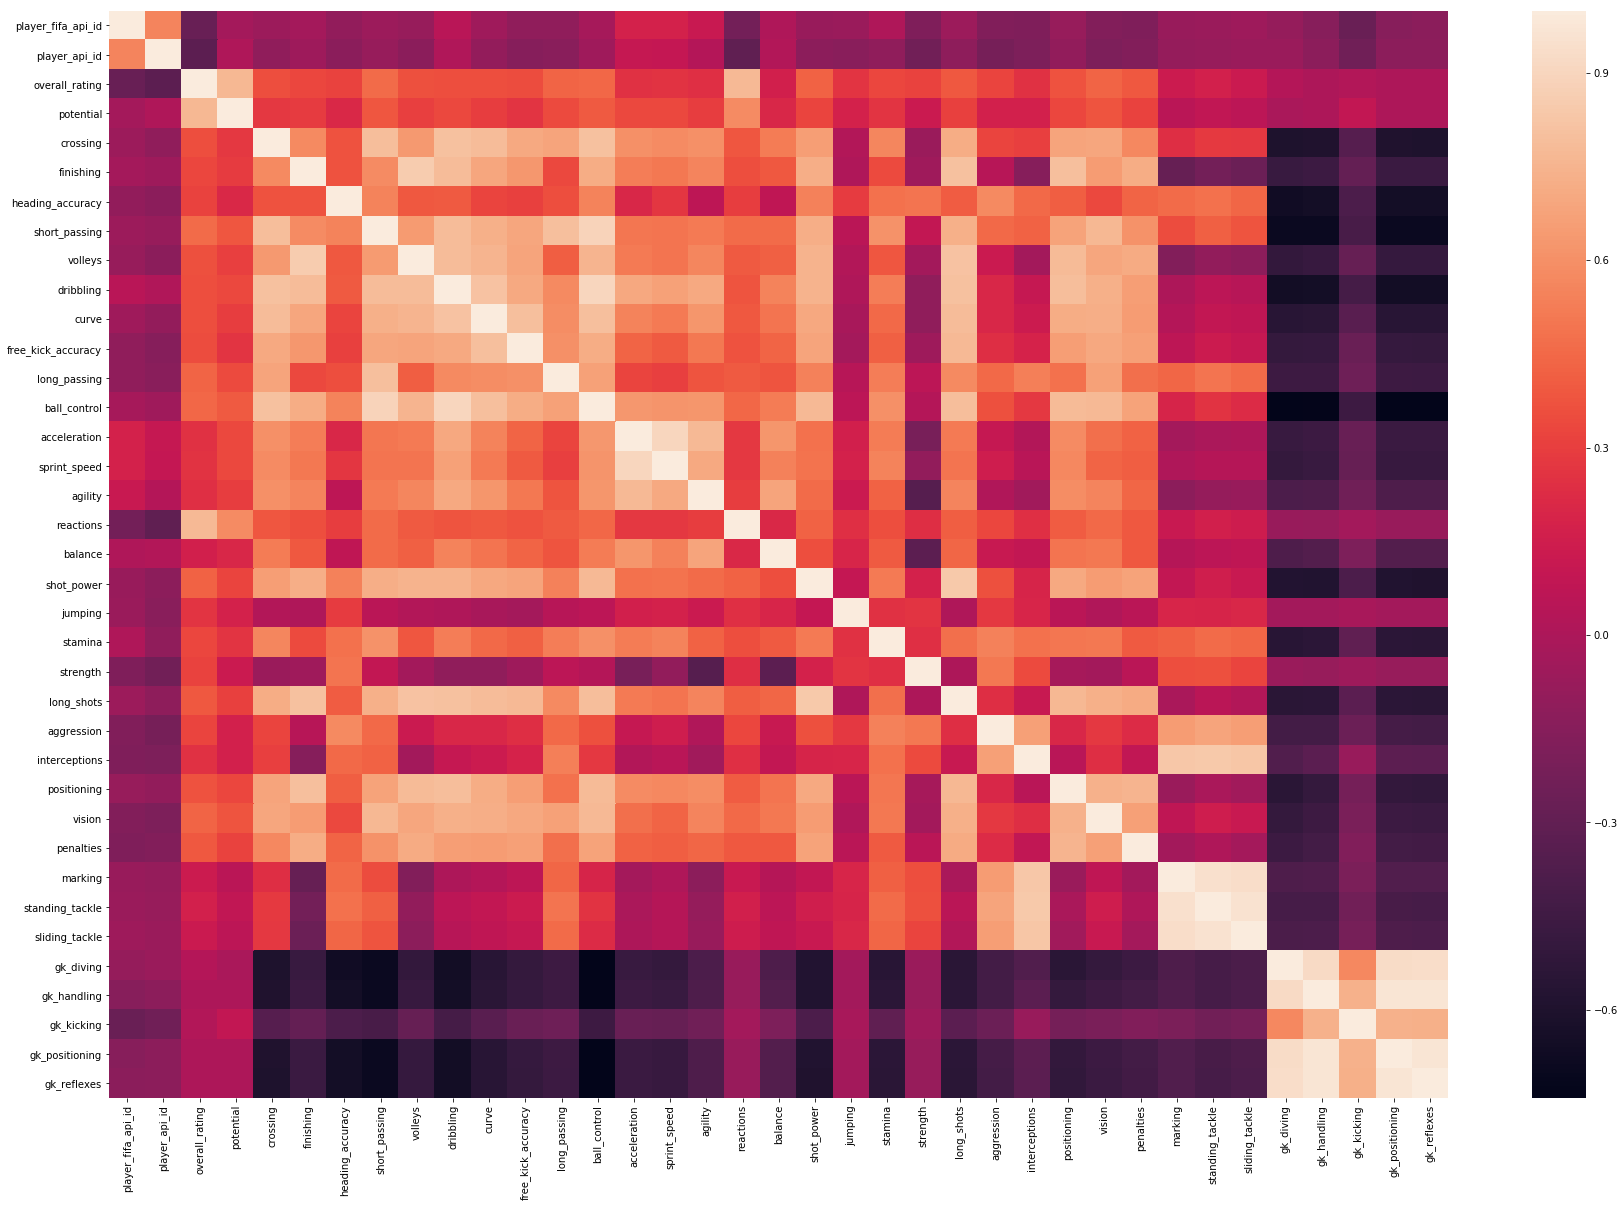

In [12]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr())

# Train and Test Split

# One Hot Encoding

One Hot Encoding is the process of splitting categorical levels to multiple columns. The dataset contains the following three categorical columns which needs hot encoding.

In [13]:
df_dummies_attacking = pd.get_dummies(df.attacking_work_rate, drop_first=True, prefix='attacking')

In [14]:
df_dummies_defensive = pd.get_dummies(df.defensive_work_rate, drop_first=True, prefix='defensive')

In [15]:
df_dummies_preferredfoot = pd.get_dummies(df.preferred_foot, drop_first=True, prefix='preferred')

In [16]:
df = df.join(df_dummies_attacking)

In [17]:
df = df.join(df_dummies_defensive)

In [18]:
df = df.join(df_dummies_preferredfoot)

In [19]:
numerical_df = df.drop(['player_fifa_api_id', 'player_api_id', 'date', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'],axis=1)

In [20]:
df.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,attacking_high,attacking_le,attacking_low,attacking_medium,attacking_norm,attacking_stoc,attacking_y,defensive_1,defensive_2,defensive_3,defensive_4,defensive_5,defensive_6,defensive_7,defensive_8,defensive_9,defensive__0,defensive_ean,defensive_es,defensive_high,defensive_low,defensive_medium,defensive_o,defensive_ormal,defensive_tocky,preferred_right
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [21]:
numerical_df.head()

,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,attacking_high,attacking_le,attacking_low,attacking_medium,attacking_norm,attacking_stoc,attacking_y,defensive_1,defensive_2,defensive_3,defensive_4,defensive_5,defensive_6,defensive_7,defensive_8,defensive_9,defensive__0,defensive_ean,defensive_es,defensive_high,defensive_low,defensive_medium,defensive_o,defensive_ormal,defensive_tocky,preferred_right
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,67.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,67.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,62.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,61.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,61.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


# Regression Model

In [22]:
numerical_df.columns

Index(['overall_rating', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'attacking_high', 'attacking_le', 'attacking_low',
       'attacking_medium', 'attacking_norm', 'attacking_stoc', 'attacking_y',
       'defensive_1', 'defensive_2', 'defensive_3', 'defensive_4',
       'defensive_5', 'defensive_6', 'defensive_7', 'defensive_8',
       'defensive_9', 'defensive__0', 'defensive_ean', 'defensive_es',
       'defensive_high', 'defensive_low', 'defensive_medium', 'defensive_o',
       'defensive_ormal', 'defensive_tocky', 

In [56]:
numerical_df.shape

(183978, 60)

In [57]:
# Dropping rows in infinite values as we can't "assume" any values for them
numerical_df.dropna(inplace=True)

In [58]:
numerical_df.shape

(181265, 60)

In [59]:
# Building Linear model using statsmodel
lm = smf.ols(formula='overall_rating ~ crossing + finishing + heading_accuracy + short_passing + dribbling + curve + free_kick_accuracy + long_passing + ball_control + acceleration + sprint_speed + agility + reactions + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle + gk_diving + gk_handling + gk_kicking + gk_positioning + gk_reflexes + attacking_high + attacking_low + attacking_norm + attacking_y + defensive_1 + defensive_2 + defensive_3 + defensive_6 + defensive_7 + defensive_8 + defensive_9 + defensive__0 + defensive_es + defensive_high + defensive_low + defensive_medium + defensive_o + defensive_ormal + preferred_right', data=numerical_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:00:35   Log-Likelihood:            -4.7076e+05
No. Observations:              181265   AIC:                         9.416e+05
Df Residuals:                  181216   BIC:                         9.421e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.8482      0.157     30.805      0.000       4.540       5.157
crossing              -0.0099      0.001    -10.231      0.000      -0.012      -0.008
finishing              0.0128      0.001     12.393      0.000       0.011       0.015
heading_accuracy       0.0990      0.001    106.306      0.000       0.097       0.101
short_passing          0.0760      0.002     47.465      0.000       0.073       0.079
dribbling             -0.0100      0.001     -7.373      0.000      -0.013      -0.007
curve                  0.0115      0.001     12.502      0.000       0.010       0.013
free_kick_accuracy     0.0102      0.001     12.285      0.000       0.009       0.012
long_passing           0.0168      0.001     15.372      0.000       0.015       0.019
ball_control           0.2300      0.002    128.150      0.000       0.227       0.234
acceleration           0.0408      0.002     25.759      0.000       0.038       0.044
sprint_speed           0.0490      0.002     32.351      0.000       0.046       0.052
agility               -0.0133      0.001    -11.651      0.000      -0.016      -0.011
reactions              0.2762      0.001    226.250      0.000       0.274       0.279
shot_power             0.0231      0.001     22.689      0.000       0.021       0.025
jumping                0.0130      0.001     15.789      0.000       0.011       0.015
stamina               -0.0157      0.001    -16.454      0.000      -0.018      -0.014
strength               0.0592      0.001     62.059      0.000       0.057       0.061
long_shots            -0.0208      0.001    -19.667      0.000      -0.023      -0.019
aggression             0.0104      0.001     13.011      0.000       0.009       0.012
interceptions          0.0178      0.001     20.795      0.000       0.016       0.019
positioning           -0.0183      0.001    -19.950      0.000      -0.020      -0.017
vision                 0.0085      0.001      8.447      0.000       0.007       0.010
penalties              0.0155      0.001     17.813      0.000       0.014       0.017
marking                0.0328      0.001     25.188      0.000       0.030       0.035
standing_tackle        0.0132      0.002      8.761      0.000       0.010       0.016
sliding_tackle        -0.0269      0.001    -20.990      0.000      -0.029      -0.024
gk_diving              0.2072      0.002    122.382      0.000       0.204       0.210
gk_handling            0.0571      0.002     25.589      0.000       0.053       0.062
gk_kicking            -0.0288      0.001    -39.687      0.000      -0.030      -0.027
gk_positioning         0.0776      0.002     34.944      0.000       0.073       0.082
gk_reflexes            0.0466      0.002     21.387      0.000       0.042       0.051
attacking_high         0.1342      0.0

1) P values for the selected columns are less than 0.05
2) R-squared value 0.786 and Adj. R-squared value 0.786 indicates the model is a sweet fit between overfitting and underfitting

In [60]:
# Splitting the dataset into the Training set and Test set
X = numerical_df.loc[:,['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'shot_power', 'jumping', 'stamina',  'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',  'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',  'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',  'gk_reflexes', 'attacking_high', 'attacking_low', 'attacking_norm', 'attacking_y',  'defensive_1', 'defensive_2', 'defensive_3', 'defensive_6', 'defensive_7', 'defensive_8',  'defensive_9', 'defensive__0', 'defensive_es',  'defensive_high', 'defensive_low', 'defensive_medium', 'defensive_o',  'defensive_ormal', 'preferred_right']].values
y = numerical_df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
train = pd.DataFrame(data=X_train, columns=['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'shot_power', 'jumping', 'stamina',  'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',  'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',  'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',  'gk_reflexes', 'attacking_high', 'attacking_low', 'attacking_norm', 'attacking_y',  'defensive_1', 'defensive_2', 'defensive_3', 'defensive_6', 'defensive_7', 'defensive_8',  'defensive_9', 'defensive__0', 'defensive_es',  'defensive_high', 'defensive_low', 'defensive_medium', 'defensive_o',  'defensive_ormal', 'preferred_right'])
train['overall_rating'] = y_train
test = pd.DataFrame(data=X_test, columns=['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'shot_power', 'jumping', 'stamina',  'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',  'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',  'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',  'gk_reflexes', 'attacking_high', 'attacking_low', 'attacking_norm', 'attacking_y',  'defensive_1', 'defensive_2', 'defensive_3', 'defensive_6', 'defensive_7', 'defensive_8',  'defensive_9', 'defensive__0', 'defensive_es',  'defensive_high', 'defensive_low', 'defensive_medium', 'defensive_o',  'defensive_ormal', 'preferred_right'])
test['overall_rating'] = y_test

In [63]:
# Fitting Multiple Linear Regression to the Training set using scikit learn
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)

In [64]:
model.coef_

array([-0.01091063,  0.01285373,  0.09856289,  0.07623318, -0.01172542,
        0.01218465,  0.01004797,  0.01680315,  0.23190573,  0.03933977,
        0.05029279, -0.01257994,  0.27576198,  0.02269149,  0.01335635,
       -0.01591626,  0.05923225, -0.02052026,  0.01089458,  0.01813407,
       -0.01812792,  0.00820181,  0.015285  ,  0.03176077,  0.01305704,
       -0.02608262,  0.20815556,  0.05604794, -0.0282725 ,  0.07719866,
        0.04677543,  0.13247778,  1.59387185,  0.60659307,  1.73982033,
        2.01553358,  0.98122296,  1.45268028,  1.70314205,  1.91987449,
        1.93350601,  1.10397726,  0.68591287,  1.73982033,  1.58753801,
        1.91554861,  1.27151752,  0.98076852,  0.60659307, -0.05861808])

In [65]:
model.intercept_

4.818588800496002

In [66]:
model.score(X_train, y_train)

0.7871841777907738

In [67]:
model.score(X_test, y_test)

0.7835682543556625

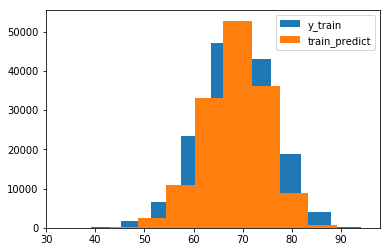

In [68]:
plt.hist(y_train, label='y_train')
plt.hist(model.predict(X_train), label='train_predict')
plt.legend()

# Evaluate Multiple Linear Model Performance

In [69]:
y_train_pred = model.predict(X_train)

In [70]:
y_test_pred = model.predict(X_test)

In [71]:
print('RMSE Train', sqrt(mean_squared_error(y_train_pred, y_train)))
print('RMSE Test' , sqrt(mean_squared_error(y_test_pred, y_test)))

RMSE Train 3.2431204635774393
RMSE Test 3.2699317474260177


The calculation shows that RMSE value for both training and test data is similar and less too. It revals that model is a good fit.

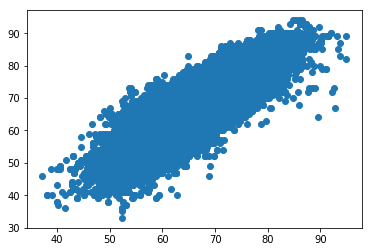

In [72]:
plt.scatter(y_train_pred, y_train)

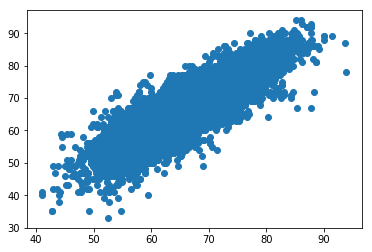

In [73]:
plt.scatter(y_test_pred, y_test)

(array([2.0000e+00, 3.0000e+00, 1.5000e+01, 7.0000e+00, 1.2000e+01,
        2.5000e+01, 5.4000e+01, 6.7000e+01, 8.0000e+01, 1.5200e+02,
        2.8800e+02, 4.2600e+02, 8.5900e+02, 1.4770e+03, 2.3990e+03,
        3.6520e+03, 5.3810e+03, 7.7910e+03, 1.0343e+04, 1.3346e+04,
        1.6017e+04, 1.7687e+04, 1.7493e+04, 1.5253e+04, 1.1679e+04,
        8.0100e+03, 4.9220e+03, 3.0910e+03, 1.9120e+03, 1.0900e+03,
        5.6900e+02, 3.4200e+02, 2.2500e+02, 1.3200e+02, 5.8000e+01,
        5.2000e+01, 2.6000e+01, 2.0000e+01, 2.1000e+01, 1.5000e+01,
        3.0000e+00, 3.0000e+00, 3.0000e+00, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-19.39247031, -18.48843788, -17.58440545, -16.68037303,
        -15.7763406 , -14.87230817, -13.96827574, -13.06424331,
        -12.16021089, -11.25617846, -10.35214603,  -9.4481136 ,
         -8.54408118,  -7.64004875,  -6.73601632,  -5.83198389,
         -4.92795147,  -4.02391904,  -3.11988661,  -2.21585418

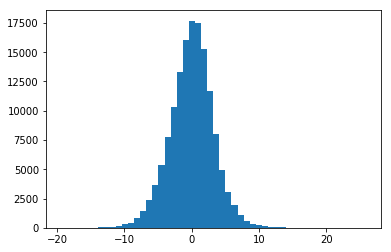

In [74]:
plt.hist(y_train_pred - y_train, bins=50)

(array([1.000e+00, 4.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 9.000e+00,
        1.700e+01, 1.100e+01, 2.900e+01, 3.400e+01, 4.900e+01, 8.200e+01,
        1.360e+02, 2.500e+02, 3.990e+02, 5.820e+02, 7.680e+02, 1.140e+03,
        1.581e+03, 1.982e+03, 2.557e+03, 3.101e+03, 3.602e+03, 3.711e+03,
        3.889e+03, 3.346e+03, 2.769e+03, 2.090e+03, 1.396e+03, 9.670e+02,
        6.270e+02, 4.010e+02, 2.690e+02, 1.560e+02, 9.500e+01, 6.000e+01,
        3.500e+01, 3.500e+01, 1.900e+01, 1.100e+01, 1.100e+01, 9.000e+00,
        4.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00]),
 array([-18.19755695, -17.41832578, -16.63909461, -15.85986344,
        -15.08063227, -14.3014011 , -13.52216993, -12.74293876,
        -11.96370759, -11.18447642, -10.40524525,  -9.62601408,
         -8.84678291,  -8.06755174,  -7.28832057,  -6.5090894 ,
         -5.72985823,  -4.95062706,  -4.17139589,  -3.39216472,
         -2.61293355,  -1.83370238,  -1.05447121,  -0.27

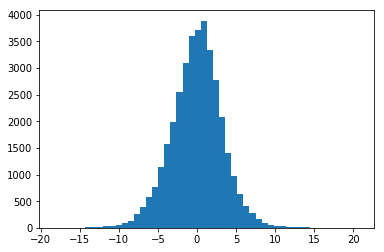

In [75]:
plt.hist(y_test_pred - y_test, bins=50)

The above two histograms reveal that error has normal distribution for both training target variable vs training predicted target variable and test target variable vs test predicted target variable



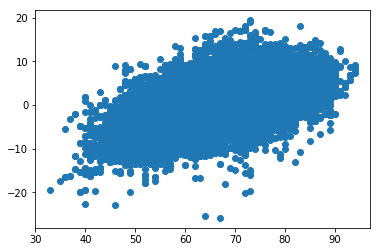

In [76]:
plt.scatter(y_train, y_train - y_train_pred)

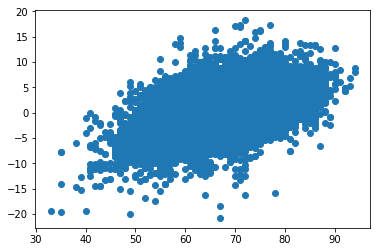

In [77]:
plt.scatter(y_test, y_test - y_test_pred)

# Evaluate DecisionTree Regression Model Performance

In [78]:
# Fitting the Decision Tree Regression to the dataset
decisionregressor = DecisionTreeRegressor(random_state = 0)
decisionregressor.fit(X_train, y_train)
y_decision_train_pred = decisionregressor.predict(X_train)
y_decision_test_pred = decisionregressor.predict(X_test)

In [79]:
print('RMSE Train', sqrt(mean_squared_error(y_decision_train_pred, y_train)))
print('RMSE Test' , sqrt(mean_squared_error(y_decision_test_pred, y_test)))

RMSE Train 0.20966679333229105
RMSE Test 1.296993244748972


The above calculation shows that RMSE value for both Training and Test data is different. Test RMSE is more than Train RMSE which reveals the model as an overfitting one which is not recommended to be used.

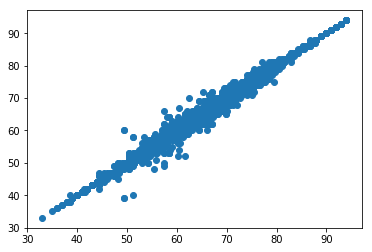

In [80]:
plt.scatter(y_decision_train_pred, y_train)

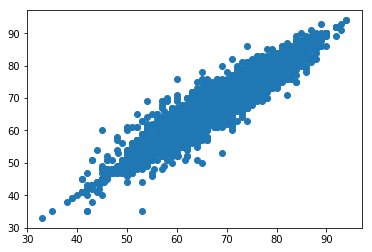

In [81]:
plt.scatter(y_decision_test_pred, y_test)

A group of predictors were selected to undergo data preprocessing tasks and fed into two different ML algorithms namely Multiple Linear Regression and DecisionTree Regression.

# Conclusion : Predictive analysis report indicates that Linear model regression works far better than DecisionTree regression. So, Players rating is to be predicted with multiple linear regression model.¶